In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import zipfile
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
path = '/content/Testing_Traffic_Sign_Classification'
isdir = os.path.isdir(path) 
if not isdir: #If directory is not present 
  os.mkdir('/content/Testing_Traffic_Sign_Classification')

In [3]:
cd '/content/Testing_Traffic_Sign_Classification'


/content/Testing_Traffic_Sign_Classification


In [4]:

#Get the trained model from the source code of this project on Github
!wget https://github.com/anuj-tahlan/Traffic-Sign-Classification/blob/492c1adb458642f4e2fe57c7532ae22e1c69ee92/TSC.h5

--2022-07-23 02:24:23--  https://github.com/anuj-tahlan/Traffic-Sign-Classification/blob/492c1adb458642f4e2fe57c7532ae22e1c69ee92/TSC.h5
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘TSC.h5’

TSC.h5                  [ <=>                ] 138.32K  --.-KB/s    in 0.04s   

2022-07-23 02:24:23 (3.73 MB/s) - ‘TSC.h5’ saved [141642]



In [5]:
!curl -LOC - https://www.dropbox.com/s/ramoqqq2q35gbct/TestingImages.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   142    0   142    0     0    412      0 --:--:-- --:--:-- --:--:--   412
100   340  100   340    0     0    560      0 --:--:-- --:--:-- --:--:--     0
100   534    0   534    0     0    638      0 --:--:-- --:--:-- --:--:--   638
100  119k  100  119k    0     0   119k      0 --:--:-- --:--:-- --:--:--  119k


In [10]:
#Either Download Trained Model or download file from Github and upload to Google Colab , in that case do not run this line
# Or run below line of code to download trained model from my source(dropbox)
#!curl -LOC - https://www.dropbox.com/s/3avgvrulenel1rp/TSC.h5

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   131    0   131    0     0    459      0 --:--:-- --:--:-- --:--:--   458
100   340  100   340    0     0    571      0 --:--:-- --:--:-- --:--:--   571
100 2901k  100 2901k    0     0  2418k      0  0:00:01  0:00:01 --:--:-- 2418k


In [7]:
import zipfile
unzip = zipfile.ZipFile('TestingImages.zip')
unzip.extractall('TestingImages')

In [6]:

# %%time
# to_unpack = [
#     ("TestingImages.zip", '/content/Testing_Traffic_Sign_Classification'),
# ]
 
# for file, directory in to_unpack:
#     print("Unzipping {} to {}...".format(file, directory))
#     with zipfile.ZipFile(file,"r") as zip_ref:
#         zip_ref.extractall(directory)

Unzipping TestingImages.zip to /content/Testing_Traffic_Sign_Classification...
CPU times: user 6.25 ms, sys: 1.17 ms, total: 7.42 ms
Wall time: 9.68 ms


In [11]:
#Load the model
from keras.models import load_model
model = load_model('/content/Testing_Traffic_Sign_Classification/TSC.h5')

In [12]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [13]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = np.argmax(model.predict(X_test), axis=-1)
    return image,Y_pred

Predicted traffic sign is:  Speed limit (70km/h)


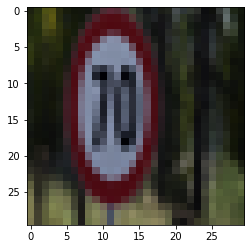

In [14]:
plot,prediction = test_on_img(r'/content/Testing_Traffic_Sign_Classification/TestingImages/1.jpg')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()